# Some Tricks
Not everything you can do in a notebook works properly when shared over `jupyterlab-dat`, but there are some pretty cool things that do work.

## DataFrames

In [1]:
import pandas
df = pandas.util.testing.makeDataFrame()
df.head()

,A,B,C,D
lxAvdLaWIw,0.579041,-0.911301,-0.384163,-1.111372
mVbUbJlgMh,0.029237,-0.063637,0.126824,-0.717153
9oa3y0SFIN,0.620017,1.592426,-0.077317,0.070526
dH92hPu2R1,1.003488,-0.360324,-0.625827,-0.601202
bVDMJqH5Ic,0.357000,-0.771036,-0.076652,0.363325


## Plotting

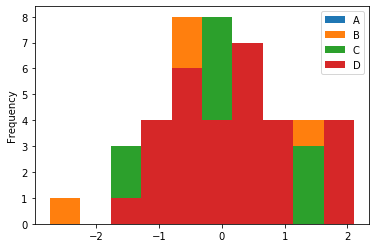

In [2]:
%matplotlib inline
df.plot.hist();

# VDOM
[vdom](https://github.com/nteract/vdom) has almost the same expressive power as widgets, but at least part of it doesn't use comm.

In [3]:
import vdom as h
some_vdom = h.h1("Hello VDOM 👋")
a_vdom_handle = display(some_vdom, display_id=True)

<h2>Buh-bye! 👋 </h2>

In [4]:
a_vdom_handle.update(h.h2("Buh-bye! 👋 "));

# Command Linking
You can publish URLs that enable JupyterLab commands:

In [5]:
%%html
<h1><a href="https://jupyter.org" data-commandlinker-command="notebook:restart-run-all">Restart & Run All</a></h1>

# One-click URL
If you are using a JupyterHub (like [Binder](https://mybinder.org)), you can create clickable links that will launch right into a shared stream. While _widgets don't work_ without the end user running our notebook, they are pretty handy for some quick UI.

In [6]:
import IPython, qrcode.image.svg, ipywidgets as W, traitlets as T, xml.etree.ElementTree as ET, io

In [7]:
hub = W.Text("https://mybinder.org/v2/gh/", description="hub")
repo = W.Text("deathbeds/jupyterlab-dat", description="repo")
branch = W.Text("master", description="branch")
dat = W.Text("21f4ea4e904307e37c9fbaf5ee28531d31eb45299771b49f51dcf1b873406c59", description="dat", layout={"width": "45em"})
html = W.HTML()

def update_qr(*_):
    url = f"{hub.value}{repo.value}/{branch.value}?urlpath=lab/tree/dat-mkii/{dat.value}"
    qr = qrcode.QRCode()
    qr.add_data(url)
    qr_img = qr.make_image(qrcode.image.svg.SvgPathImage)
    out = io.BytesIO()
    qr_img._write(out)
    html.value = f"""
        <a href="{url}" style="text-decoration: underline; font-size: 2rem; color: #2aca4b;">DRAG DAT ⬡</a>
        <br/>
        {out.getvalue().decode("utf-8")}
    """
    
[w.observe(update_qr) for w in [hub, repo, branch, dat]]
update_qr()

In [8]:
W.HBox([W.VBox([hub, repo, branch, dat]), html])